In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#load data
mnist = pd.read_csv('train.csv')
y = mnist.iloc[:,0]
X = mnist.iloc[:,1:]

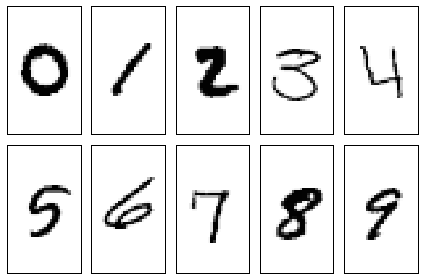

In [3]:
#visulize data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True,sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i].iloc[0,:].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys',interpolation='nearest')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
#data split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.3)
X_train,X_cross,y_train,y_cross = train_test_split(X_train,y_train,random_state=0,test_size = 0.3)

/home/ksevta/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#standerize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_cross = sc.transform(X_cross)
X_test = sc.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(alpha=0.001,random_state=0,hidden_layer_sizes=200)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_cross,nn.predict(X_cross))

0.963265306122


In [25]:
print accuracy_score(y_test,nn.predict(X_test))

0.964206349206


In [34]:
test = pd.read_csv('test.csv')
predict = nn.predict(test)
predict

array([2, 0, 9, ..., 3, 9, 2])

In [43]:
output = pd.DataFrame(predict,columns=['Label'])
output['ImageId'] = np.arange(len(output['Label']))+1
output = pd.DataFrame(output,columns=['ImageId','Label']) 

In [52]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [56]:
output.to_csv('output.csv',index = False)

In [55]:
new = pd.read_csv('output.csv')
new.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
